## Poisson Regression with boston data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Data manipulation

In [2]:
from sklearn import datasets
boston = datasets.load_boston()
X_train = boston['data']
y_train = boston['target'] #number of car accidents
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
X_train[0, ]


array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [4]:
y = np.round_(y_train, decimals=0, out=None) #make into integers

In [5]:
print(X_train.shape, y.shape)

(506, 13) (506,)


* X_train does not contain the column of 1's. In the following, we add the column of 1's into the model matrix.

In [6]:
my_ones = np.ones([506,1])
X = np.concatenate((my_ones, X_train), axis=1)
print(X.shape)

(506, 14)


In [7]:
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()) #Find W based on MLE
poisson_results = poisson_model.fit();

In [8]:
print(poisson_results.summary()) # almost same
# gradient descent algorithm working very well

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  506
Model:                            GLM   Df Residuals:                      492
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.0
Date:                Wed, 25 Nov 2020   Deviance:                       362.69
Time:                        16:56:45   Pearson chi2:                     389.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7780      0.232     16.268      0.0

In [ ]:
# coef 비교를 통해 converge 잘 되었는지 비교

In [9]:
yhat = poisson_results.mu #prediction for each observation

In [10]:
# yhat = poisson_results.predict(X)

In [10]:
np.mean((y_train-yhat)**2)  #Calculation of MSE

16.7256638587818

* Calculate MSE again!

In [11]:
W = poisson_results.params # Estimated parameters

In [12]:
my_yhat = np.exp(np.dot(X, W) )
print(my_yhat.shape)

np.mean((y_train-my_yhat)**2)

(506,)


16.7256638587818

### Draw plot

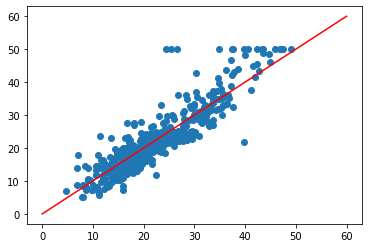

In [13]:
import matplotlib.pyplot as plt
plt.plot(yhat,y_train, 'o')
plt.plot([0, 60], [0,60], 'r-')

## Optimization based on Gradient Dsecent

In [14]:
XX=(X-X.mean(axis=0))/np.std(X, axis=0)
# GD algorithm을 쓰려면 X standardized를 해줘야 함

C:\anaconda3\envs\env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [15]:
XX[:,0]=1

In [16]:
Y=y.reshape([506,1])
Y.shape

(506, 1)

In [17]:
import scipy

In [18]:
def f(beta, X, Y): # this is -1 (beta)
    temp = np.exp(np.dot(X,beta))-Y*np.dot(X, beta)+scipy.special.gammaln(Y+1)
    return np.sum(temp)

def df(beta, X, Y): 
    # in actual data analysis, using tensorflow, df is freely obtained from f function, derivative(f)
    temp = np.exp(np.dot(X,beta))-Y
    temp2 = np.mean(X*temp, axis=0)
    return temp2.reshape([14,1])

In [19]:
beta0=np.random.normal(0,1,[14,1]) # 설명 변수 13개와 intercept 1개 -> 14개
lr=0.001
iter1=5000 # iteration : 5000 -> # of data in each iteration : 506
# of total data -> 5000 * 506
beta=beta0
history=np.ones([iter1,])
for i in range(0,iter1):
    beta = beta - lr * df(beta, XX, Y)
    history[i]=f(beta, XX, Y)
    #print("************************",  i, "**********************",    beta)

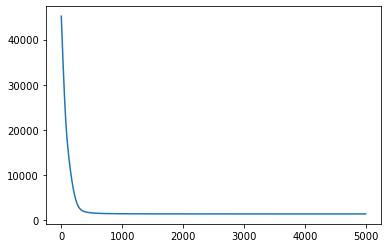

In [20]:
import matplotlib.pyplot as plt
plt.plot(history[:]) 
# learning curve - flat : learning is over when 1000
# x축 : iteration number
# negative라서 값이 작을 수록 좋음

In [21]:
beta # coef

array([[ 3.04868941],
       [-0.08842327],
       [ 0.02424911],
       [ 0.01497295],
       [ 0.02345328],
       [-0.08017817],
       [ 0.08606746],
       [ 0.01027125],
       [-0.1031129 ],
       [ 0.13286395],
       [-0.08893659],
       [-0.07750647],
       [ 0.04368704],
       [-0.22409618]])

In [22]:
f(beta, XX, Y)

1416.0175012993686

In [23]:
my_yhat = np.exp(np.dot(X, W) )
my_yhat2 = np.exp(np.dot(XX, beta) )

In [24]:
my_yhat[1:10]

array([24.69482883, 31.57108125, 29.83295113, 28.29189   , 26.02959171,
       22.14341111, 18.13403117, 11.96775387, 18.19758204])

In [25]:
my_yhat2[1:10]

array([[24.69238147],
       [31.57105001],
       [29.83301505],
       [28.29224977],
       [26.02757543],
       [22.13989725],
       [18.13077489],
       [11.96538175],
       [18.19394065]])

## Mini Batch Learning

In [ ]:
# gradient descent의 문제점 : local minimum (지역 최적화)
# local minimum에서 빠져나오기 위해 mini batch learning을 실행 
# random chosen five i
# gradient log f ... iteratation : 5000
# # of data in each iter : 5 -> randomly chosen number
# # of total data : 5000*5
# 데이터 수만 보면 gradient descent가 더 정확함, local minimum에 빠질 수 있다는 문제에도 ...

# New concept : 'epoch' ... 데이터의 바퀴 수
# important ! how choose all of data
# # of data 506
# in Mini batch, iter : 100, # of data used in each iteration : 10
# # of toal data : 100*10 = 1000 data -> this can be regarded as 2 iterations in GD
# -> 여기서 epoch은 2가 됨

# efficiency of mini batch -> total number of data, 훨씬 빠름
# meaning of epoch -> how many times each observation is used?
# = on average, each data is used two times
# 506 * 10 = 5000개 data 
# mini batch에서는 데이터를 10개씩 씀 (batch size)
# full gradient descent에서 정의한 후 iteration 뒤에 몇 개의 data가 쓰였는지
# 500개 각각의 데이터가 두 번 씩 쓰였다는 의미 : epoch = 2

In [26]:
epoch=1000
lr=0.001
# # of data : 506
batch_size=32 # number of data used in each iteration : should be 2^n
# Q : how iteration do you want to have to achieve 1000 epoch?
# 32 batch size * iteration = 1000*506 (epoch* data)
# iteration = epoch*data/batch size (integer)

iter_per_epoch = np.array(506/batch_size).astype(int)
iter_num = epoch* iter_per_epoch
iter_num

15000

In [29]:
iter_per_epoch # 15번 iter * 32 batch = 500 data
# 15000/1000

array(15)

In [108]:
33%10

3

In [27]:
history=np.ones([epoch,])
beta0=np.random.normal(0,1,[14,1])
ii=0
beta=beta0
# per each iter, history save -> 15000번 마다 저장
# per each epoch, history save -> 15번 마다 저장 *32 = 500개 데이터
for i in range(0, iter_num):
    my_batch = np.random.choice(506, batch_size) # 506개 중에서 32개 난수 뽑음
    beta = beta - lr * df(beta, XX[my_batch, :], Y[my_batch, :]) # 행에 삽입
    if i%iter_per_epoch == 0:
        history[ii]=f(beta, XX, Y) # 실제 알고리즘에서 사용 x - 계산 안해도됨
        ii=ii+1
        # calculate f -> this takes some type

In [ ]:
# sigma -> 1부터 500개까지 사용하면 gd, 여기서 랜덤하게 x matrix, y matrix를 사용해서 리턴하는 것이 mini batch
# -> 모든 행을 다 넣어주지 않고 해당하는 만큼의 log likelihood를 계산해서 돌려줌
# my batch : 난수 뽑는 것

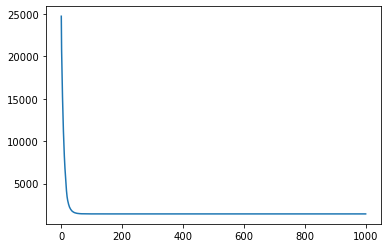

In [28]:
import matplotlib.pyplot as plt
plt.plot(history[:])

In [111]:
history[-1]

1417.161109014909

In [ ]:
# beta 잘 학습됨